In [1]:
### Import libraries and set plot style

import numpy as np
from scipy.optimize import curve_fit
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
colors = ['#202020', '#d62728', '#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#bcbd22', '#e377c2', '#17becf', '#1f5a0a', '#8c564b', '#7f7f7f']
         ## black    red        blue       green      orange     violet     yellow     pink       lightblue  darkgreen  dirty-red  grey
plt.rcParams.update({'font.size': 15.5,
                     'axes.titlepad': 25,
                     'axes.labelpad': 20,
                     'axes.labelsize': 20,
                     'xtick.labelsize' : 15.5,
                     'ytick.labelsize' : 15.5,
                     'axes.prop_cycle': cycler('color', colors),
                     #'axes.grid': True,
                     'axes.linewidth': 0.5,
                     'lines.linewidth': 1.5,
                     'lines.markersize': 5,
                     'scatter.marker': 'o',
                     #'errorbar.capsize': 2,
                     'figure.dpi': 100.0,
                     'figure.figsize': [8, 5],
                     'xtick.top' : True,
                     'ytick.right' : True,
                     'xtick.direction' : 'out',
                     'ytick.direction' : 'out',
                     'xtick.major.size': 8,
                     'xtick.minor.size': 3,
                     'ytick.major.size': 8,
                     'ytick.minor.size': 3,
                     'xtick.major.width': 1,
                     'xtick.minor.width': 0.5,
                     'ytick.major.width': 1,
                     'ytick.minor.width': 0.5})

In [2]:
### Data
n = np.nan
results_folder = "results20"
unique_T = np.array([70., 50., 30.])
labels = ["$\\Delta\\varepsilon_2$", "$\\omega_{P2}$", "$\\Delta\\varepsilon_3$", "N$_2$-$\\langle\\varepsilon'\\rangle_{10Hz}$", "CO$_2$-$\\langle\\varepsilon'\\rangle_{10Hz}$"]
ls = [":", None, ":", None, None]

temp_de2 = np.array([70., 70., 50., 50., 30., 30.])
tau1_de2 = np.array([5.59, 9.05, n, n, n, n])
tau2_de2 = np.array([63.82, 131.07, 25.25, 88.1, 45.62, 31.22])

temp_wp2 = np.array([70., 70., 50., 50., 30.])
tau1_wp2 = np.array([3.1, 3.7, n, n, 8.1])
tau2_wp2 = np.array([29.16, 39.81, 64.58, 51.66, 168.48])

temp_de3 = temp_de2
tau1_de3 = np.array([4.72, 9.86, n, n, n, n])
tau2_de3 = np.array([59., 91.13, 17.97, 16.59, 96.45, 100.04])

temp_nar = np.array([70., 70., 50., 50., 30.])
tau1_nar = np.array([0.85, 0.98, 3.28, 1.75, 4.96])#12.03, 7.63, 4.33, 1.45, 5.58
tau2_nar = np.array([27.82, 29.96, 32.98, 27.28, 70.06])#43.47, 38.43, 36.91, 27.03, 82.81

temp_car = np.array([70., 70., 50., 30., 30.])
tau1_car = np.array([4.39, 4.17, 0.56, 5.51, 2.19])
tau2_car = np.array([42.64, n, 5.78, 54.67, 23.38])

temp_lists = [temp_de2, temp_wp2, temp_de3, temp_nar, temp_car]
tau1_lists = [tau1_de2, tau1_wp2, tau1_de3, tau1_nar, tau1_car]
tau2_lists = [tau2_de2, tau2_wp2, tau2_de3, tau2_nar, tau2_car]

/tmp/ipykernel_122478/2588497068.py:9: RuntimeWarning: Mean of empty slice
  t_avg_0 = np.nanmean(t[mask])


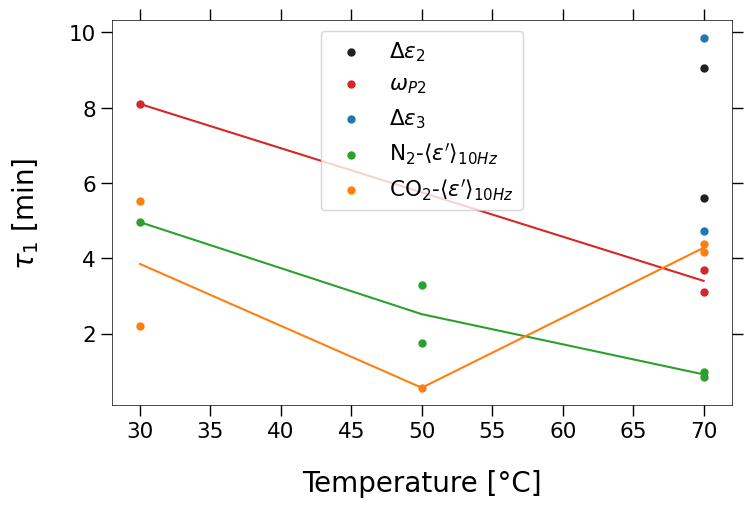

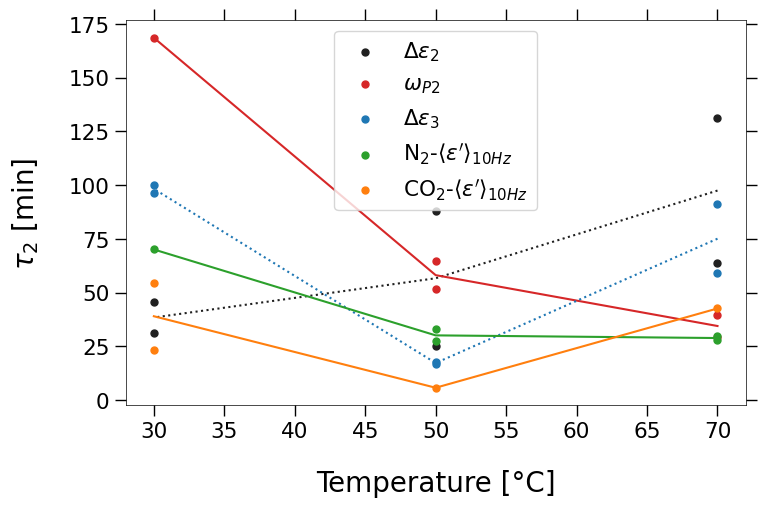

In [3]:
for i, l in enumerate (labels) :
    T = temp_lists[i]
    t = tau1_lists[i]

    t_average = []
    T_average = []
    for T0 in unique_T :
        mask = T == T0
        t_avg_0 = np.nanmean(t[mask])
        if not np.all(np.isnan(t_avg_0)) :
            t_average.append(t_avg_0)
            T_average.append(T0)

    plt.scatter(T, t, label=l)
    plt.plot(T_average, t_average, ls=ls[i])

plt.legend()
plt.xlabel("Temperature [°C]")
plt.ylabel("$\\tau_1$ [min]")
#plt.savefig(results_folder+"/tau/short.pdf", bbox_inches='tight')
plt.show()

for i, l in enumerate (labels) :
    T = temp_lists[i]
    t = tau2_lists[i]

    t_average = []
    T_average = []
    for T0 in unique_T :
        mask = T == T0
        t_avg_0 = np.nanmean(t[mask])
        if not np.all(np.isnan(t_avg_0)) :
            t_average.append(t_avg_0)
            T_average.append(T0)

    plt.scatter(T, t, label=l)
    plt.plot(T_average, t_average, ls=ls[i])

plt.legend()
plt.xlabel("Temperature [°C]")
plt.ylabel("$\\tau_2$ [min]")
#plt.savefig(results_folder+"/tau/long.pdf", bbox_inches='tight')
plt.show()